# Yearly Observations

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

# set the max columns to none
pd.set_option('display.max_columns', None)
# set the max columns to none
pd.set_option('display.max_rows', None)

## Data exploring

In [3]:
file_observation_year_count = f'../1_scraping/scraped_data/cleaned/observation_year_count_clean.csv'

# Load the data
df_year_count = pd.read_csv(file_observation_year_count, header=0)

# Preview
df_year_count.sort_values('observation_count', ascending=False).head(5)

,year,observation_count,individu_count
50,2021,3807834,116756886
49,2020,3440886,25425947
51,2022,3432614,26575866
53,2024,3270062,24715122
52,2023,3204569,833548443


In [4]:
df_year_count.index

RangeIndex(start=0, stop=54, step=1)

In [5]:
df_year_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   year               54 non-null     int64
 1   observation_count  54 non-null     int64
 2   individu_count     54 non-null     int64
dtypes: int64(3)
memory usage: 1.4 KB


In [6]:
df_year_count.describe(include='all')

,year,observation_count,individu_count
count,54.000000,5.400000e+01,5.400000e+01
mean,1997.500000,6.770629e+05,2.496192e+07
std,15.732133,1.101915e+06,1.136369e+08
min,1971.000000,2.242000e+03,3.498700e+04
25%,1984.250000,3.569200e+04,1.209611e+06
50%,1997.500000,8.169650e+04,2.920168e+06
75%,2010.750000,1.071938e+06,1.728578e+07
max,2024.000000,3.807834e+06,8.335484e+08


### Yearly Evolution

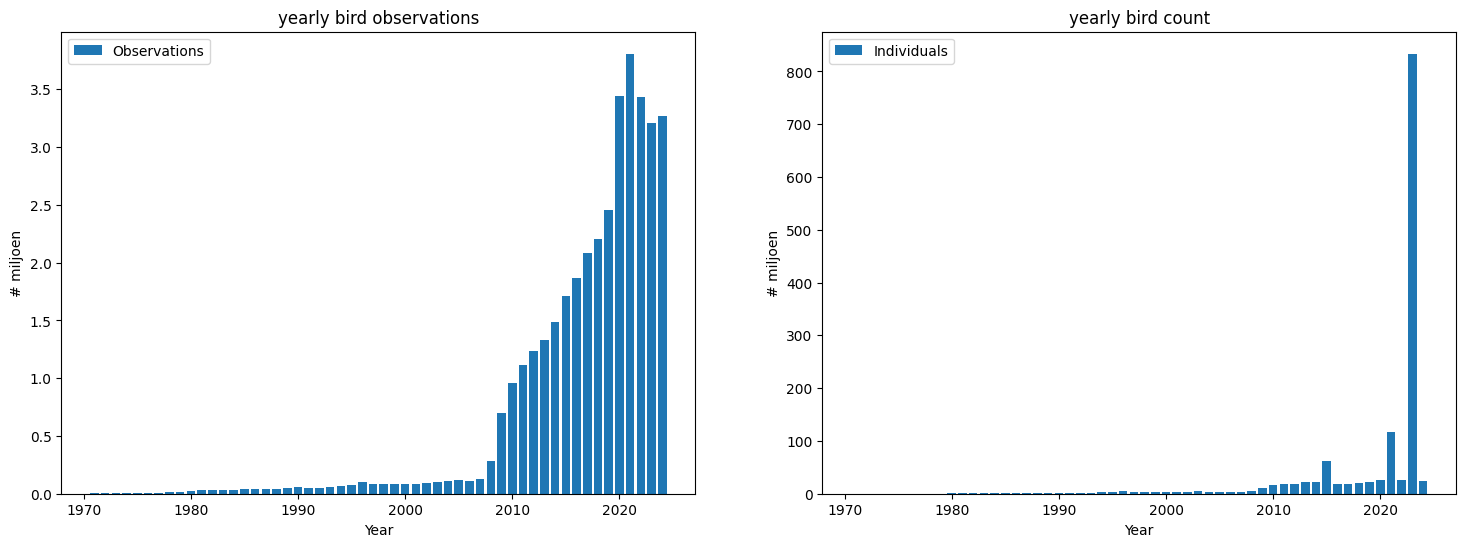

In [7]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18, 6))

ax1.bar(df_year_count['year'], df_year_count['observation_count']/1_000_000, label='Observations')
ax1.legend()
ax1.set_xlabel('Year')
ax1.set_ylabel('# miljoen')
ax1.set_title('yearly bird observations')

ax2.bar(df_year_count['year'], df_year_count['individu_count']/1_000_000, label='Individuals')
ax2.legend()
ax2.set_xlabel('Year')
ax2.set_ylabel('# miljoen')
ax2.set_title('yearly bird count')

plt.show()

#### Conclusie
We zien elk jaar een toename in het aantal waarnemingen. Vanaf 2008 zien we dat het aantal waarnemingen enorm begint toe te nemen, dit is 4 jaar na de oprichting van Observation.org in 2004. We gaan ervan uit doordat nu ook burgerwaarnemingen mee worden opgenomen.
2020 en 2021 zijn ook pieken in het aantal waarnemingen. Dit lijkt deels te verklaren door de corona uitbraak, waardoor de mensen weer veel natuur opzochten en gingen wandelen.  


## Cleaning

In [8]:
df_year_count_cleaned = df_year_count.copy()

# Drop the columns that are not needed
df_year_count_cleaned.drop(columns=['individu_count'], inplace=True)

# Make the year the index
df_year_count_cleaned.set_index('year', inplace=True)
df_year_count_cleaned.rename(columns={'observation_count': 'allbirds_observation_count'}, inplace=True)
df_year_count_cleaned.head(5)

,allbirds_observation_count
year,
1971,2242
1972,5281
1973,6547
1974,9548
1975,9115


## Final check and write to parquet file

In [9]:
df_year_count_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 1971 to 2024
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   allbirds_observation_count  54 non-null     int64
dtypes: int64(1)
memory usage: 864.0 bytes


In [10]:
df_year_count_cleaned.to_parquet(f'./clean_data/observations_yearly_clean.parquet', index=True, engine="pyarrow")